<a href="https://colab.research.google.com/github/swopnimghimire-123123/Maths_For_ML/blob/main/02_Histograms_Ogives_%26_Central_Tendency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 2: Histograms, frequency polygons (ogives) & Central Tendency

---

## 1. Introduction
In this notebook, we will learn how to summarize and visualize **numerical data**.  

**Key topics:**  
- Histograms and frequency polygons (ogives)  
- Measures of central tendency: **Mean, Median, Mode**  

**Why it matters:**  
Central tendency gives a single value representing a dataset, and histograms/ogives help visualize the distribution of numerical data.

---

## 2. Theory

### 2.1 Histograms
- A histogram displays frequency distribution of numerical data.  
- Bars represent ranges (bins) of values.  

### 2.2 Frequency Polygon (Ogive)
- A line graph connecting midpoints of histogram bins.  
- Shows trends and cumulative distribution.  

### 2.3 Measures of Central Tendency
- **Mean (Average):** \(\bar{x} = \frac{\sum x_i}{n}\)  
- **Median:** Middle value when data is sorted.  
- **Mode:** Most frequent value.  

**When to use:**  
- Mean: symmetric distributions, no outliers  
- Median: skewed distributions  
- Mode: categorical or discrete data  

---

## 3. Code Demonstration


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Create a sample dataset: Student scores out of 100
np.random.seed(42)
df = pd.DataFrame({
    "student":[f"s{i}" for i in range(1,21)],
    "score":np.random.randint(0,101,size=20)
})
df.head()

,student,score
0,s1,51
1,s2,92
2,s3,14
3,s4,71
4,s5,60


### HISTOGRAM

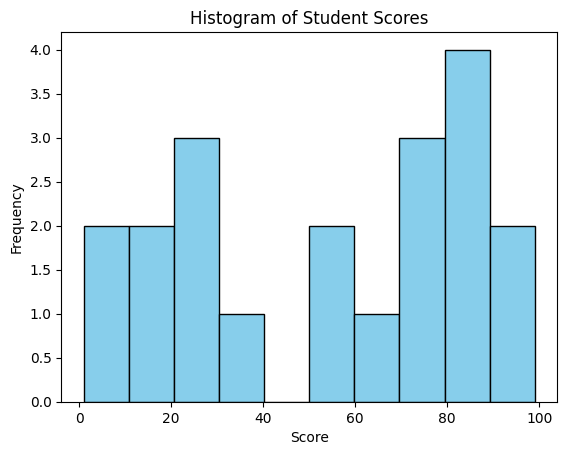

In [ ]:
plt.hist(df["score"], bins=10, color = "skyblue", edgecolor="black")
plt.title("Histogram of Student Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

### FREQUENCY POLYGON / OGVIE

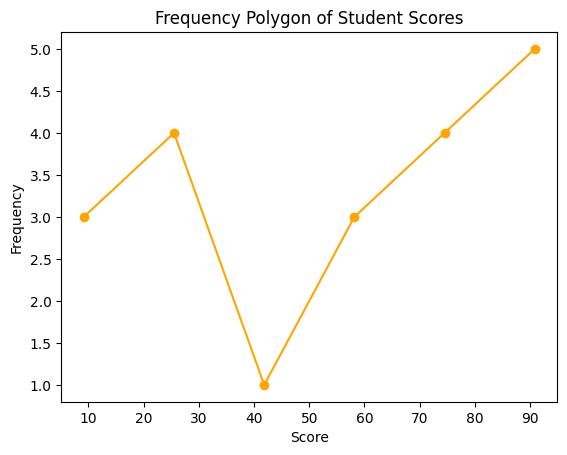

In [ ]:
counts, bins = np.histogram(df["score"], bins=6)
midpoints = 0.5*(bins[1:] + bins[:-1])

plt.plot(midpoints, counts, marker="o", linestyle="-", color="orange")
plt.title("Frequency Polygon of Student Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

### Measures of Central Tendency

In [ ]:
mean_score = df["score"].mean()
median_score = df["score"].median()
mode_score = stats.mode(df["score"])[0]

print(f"Mean: {mean_score}")
print(f"Median: {median_score}")
print(f"Mode: {mode_score}")

Mean: 53.1
Median: 56.0
Mode: 74


# 4. Practice Problems

- Calculate the mean, median, and mode for a new dataset of exam scores: [55, 70, 65, 90, 85, 70, 60].

- Create a histogram for these scores with 5 bins.

- Draw a frequency polygon (ogive) for the same data.

- Discuss which measure of central tendency is most appropriate if the data is skewed.

In [ ]:
'''Calculate the mean, median, and mode for a new dataset of exam scores:
   [55, 70, 65, 90, 85, 70, 60].'''

x = [55, 70, 65, 90, 85, 70, 60]
mean_score = np.mean(x)
median_score = np.median(x)
mode_score = stats.mode(x)[0]

print(mean_score)
print(median_score)
print(mode_score)

70.71428571428571
70.0
70


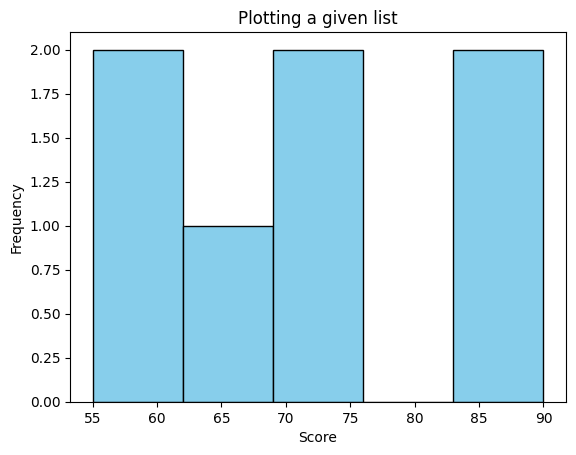

In [ ]:
### Create a histogram for these scores with 5 bins.
plt.hist(x, bins=5, color = "skyblue", edgecolor="black")
plt.title("Plotting a given list")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

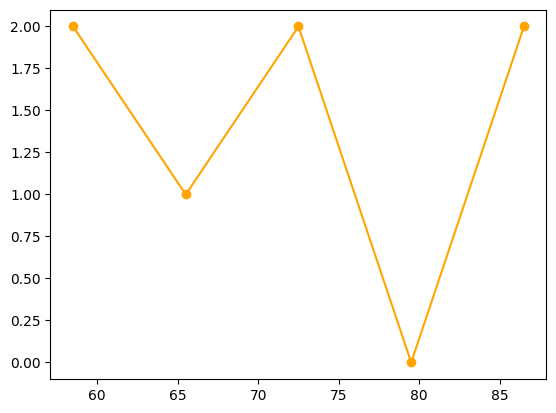

In [ ]:
### Draw a frequency polygon (ogive) for the same data.

counts, bins = np.histogram(x, bins=5)
midpoints = 0.5*(bins[1:] + bins[:-1])

plt.plot(midpoints, counts, marker="o", linestyle="-", color="orange")

In [ ]:
### Discuss which measure of central tendency is most appropriate if the data
# is skewed.

### Discuss which measure of central tendency is most appropriate if the data is skewed.

When data is skewed (either to the left or right), the **median** is generally the most appropriate measure of central tendency.

*   The **mean** is pulled towards the tail of the distribution, so it can be significantly affected by outliers in skewed data.
*   The **mode** is the most frequent value and may not be representative of the center of the distribution in skewed data.
*   The **median**, as the middle value, is less affected by extreme values and provides a better representation of the typical value in a skewed dataset.

---

##  Skewness and Central Tendency

Not all datasets are symmetric.  
- **Symmetric Distribution:** Mean ≈ Median ≈ Mode  
- **Right-skewed (positive skew):** Mean > Median > Mode  
- **Left-skewed (negative skew):** Mean < Median < Mode  

Skewness affects which measure of central tendency is most reliable.  

---


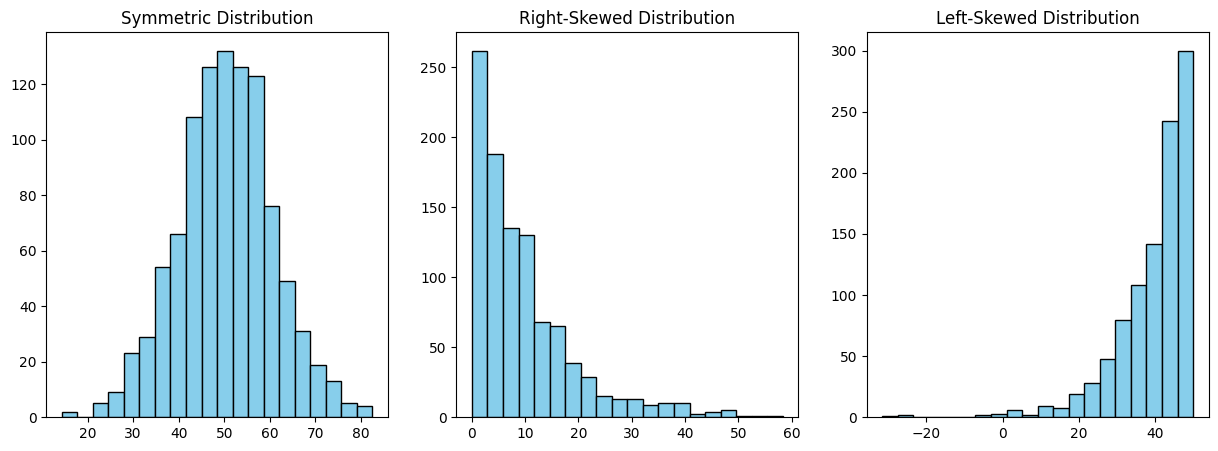

In [ ]:
# Symmetric distribution (normal)
symmetric_data = np.random.normal(loc=50, scale=10, size=1000)

# Right-skewed distribution (exponential)
right_skewed = np.random.exponential(scale=10, size=1000)

# Left-skewed distribution (negative exponential shifted)
left_skewed = -np.random.exponential(scale=10, size=1000) + 50

datasets = {
    "Symmetric": symmetric_data,
    "Right-Skewed": right_skewed,
    "Left-Skewed": left_skewed
}

# Plot histograms for comparison
fig, axes = plt.subplots(1, 3, figsize=(15,5))
for ax, (name, data) in zip(axes, datasets.items()):
    ax.hist(data, bins=20, color="skyblue", edgecolor="black")
    ax.set_title(f"{name} Distribution")
plt.show()


In [ ]:
for name, data in datasets.items():
    mean_val = np.mean(data)
    median_val = np.median(data)
    mode_val = stats.mode(data, keepdims=True)[0][0]
    skew_val = stats.skew(data)

    print(f"\n{name} Distribution")
    print(f"Mean   = {mean_val:.2f}")
    print(f"Median = {median_val:.2f}")
    print(f"Mode   = {mode_val:.2f}")
    print(f"Skewness = {skew_val:.2f}")



Symmetric Distribution
Mean   = 50.38
Median = 50.49
Mode   = 14.32
Skewness = -0.02

Right-Skewed Distribution
Mean   = 9.63
Median = 6.83
Mode   = 0.00
Skewness = 1.79

Left-Skewed Distribution
Mean   = 39.71
Median = 42.46
Mode   = -31.59
Skewness = -2.21
